<a href="https://colab.research.google.com/github/raisaurabh44/My_project/blob/main/Eda_Stocks_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf
import pandas as pd

def Database(Companies):
    all_data = pd.DataFrame()  # Create an empty DataFrame to store all data

    for company in Companies:
        # Fetch historical data using yfinance
        stock_data = yf.download(company.upper(), start="2010-01-01", end="2024-01-01")

        # Add a new column with the company name
        stock_data['Company'] = company

        # Append data to the master DataFrame
        all_data = all_data.append(stock_data)

    # Save the master DataFrame to a single CSV file
    master_csv_path = r'/content/drive/MyDrive/Project_Stock_Management/master_data.csv'  # Use raw string or escape backslashes
    all_data.to_csv(master_csv_path, index=True)

if __name__ == "__main__":
    List_of_Companies = ['TATACHEM.NS']#, 'TATACOMM.NS', 'TATAELXSI.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TATAPOWER.NS']
    Database(List_of_Companies)


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed
<ipython-input-2-480ce56a4317>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(stock_data)


# Loading the data set in data frame

In [52]:
df=pd.read_csv('/content/drive/MyDrive/Project_Stock_Management/master_data.csv')
df1=df.iloc[:,:-1]
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,325.100006,326.500000,319.299988,325.149994,230.323761,378946
1,2010-01-05,328.000000,332.000000,326.100006,329.899994,233.688492,372564
2,2010-01-06,332.350006,336.200012,328.049988,328.399994,232.625900,346131
3,2010-01-07,328.000000,329.899994,320.049988,321.600006,227.809097,280690
4,2010-01-08,322.000000,327.500000,315.000000,317.100006,224.621506,459436
...,...,...,...,...,...,...,...
3449,2023-12-22,1016.000000,1041.000000,1012.500000,1022.049988,1022.049988,1179769
3450,2023-12-26,1027.000000,1102.000000,1020.700012,1094.250000,1094.250000,7243281
3451,2023-12-27,1100.000000,1102.849976,1077.150024,1089.849976,1089.849976,1984857
3452,2023-12-28,1094.699951,1095.000000,1079.050049,1086.599976,1086.599976,1387134


## Data_Preprocessing and EDA


In [53]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,325.100006,326.500000,319.299988,325.149994,230.323761,378946
1,2010-01-05,328.000000,332.000000,326.100006,329.899994,233.688492,372564
2,2010-01-06,332.350006,336.200012,328.049988,328.399994,232.625900,346131
3,2010-01-07,328.000000,329.899994,320.049988,321.600006,227.809097,280690
4,2010-01-08,322.000000,327.500000,315.000000,317.100006,224.621506,459436


In [54]:
from sys import version_info
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3454 non-null   object 
 1   Open       3454 non-null   float64
 2   High       3454 non-null   float64
 3   Low        3454 non-null   float64
 4   Close      3454 non-null   float64
 5   Adj Close  3454 non-null   float64
 6   Volume     3454 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 189.0+ KB


In [55]:
df1.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

*No Null Values*

In [56]:
df1['Date']=pd.to_datetime(df1['Date'])

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3454 non-null   datetime64[ns]
 1   Open       3454 non-null   float64       
 2   High       3454 non-null   float64       
 3   Low        3454 non-null   float64       
 4   Close      3454 non-null   float64       
 5   Adj Close  3454 non-null   float64       
 6   Volume     3454 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 189.0 KB


In [58]:
df1.sort_values(by='Date', ignore_index=True)
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,325.100006,326.500000,319.299988,325.149994,230.323761,378946
1,2010-01-05,328.000000,332.000000,326.100006,329.899994,233.688492,372564
2,2010-01-06,332.350006,336.200012,328.049988,328.399994,232.625900,346131
3,2010-01-07,328.000000,329.899994,320.049988,321.600006,227.809097,280690
4,2010-01-08,322.000000,327.500000,315.000000,317.100006,224.621506,459436
...,...,...,...,...,...,...,...
3449,2023-12-22,1016.000000,1041.000000,1012.500000,1022.049988,1022.049988,1179769
3450,2023-12-26,1027.000000,1102.000000,1020.700012,1094.250000,1094.250000,7243281
3451,2023-12-27,1100.000000,1102.849976,1077.150024,1089.849976,1089.849976,1984857
3452,2023-12-28,1094.699951,1095.000000,1079.050049,1086.599976,1086.599976,1387134


In [59]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3454.0,5.445760e+02,2.462058e+02,201.699997,331.062492,444.650009,7.123250e+02,1.207000e+03
High,3454.0,5.518132e+02,2.490059e+02,213.800003,335.424995,450.699997,7.220375e+02,1.214900e+03
Low,3454.0,5.367966e+02,2.429929e+02,197.000000,326.012497,439.100006,7.047125e+02,1.173000e+03
Close,3454.0,5.438704e+02,2.458102e+02,200.699997,330.200012,444.024994,7.119250e+02,1.199650e+03
Adj Close,3454.0,4.806718e+02,2.604195e+02,182.508087,262.194855,367.393784,6.250405e+02,1.178657e+03
Volume,3454.0,1.100482e+06,2.022499e+06,0.000000,321087.000000,553580.000000,1.052330e+06,3.126465e+07


In [60]:
df1.duplicated().sum()

0

## EDA

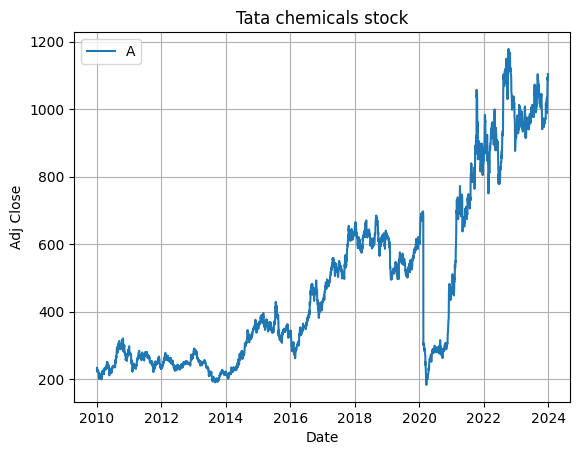

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
# Lets see the historical view of thr closing pries
#plt.figure(figsize=(10,12))
plt.plot(df1['Date'], df1['Adj Close'])
plt.title('Tata chemicals stock')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend('Adj Close')
plt.grid(True)
plt.show()

## We can see from the above graph that Tata Chemicals Shares have tremendous growth in the 2020-2021 period.

*we can see that COVID-19 is the primary factor affecting the stock price hike during 2020-2021 period.*

Text(0, 0.5, 'Volume')

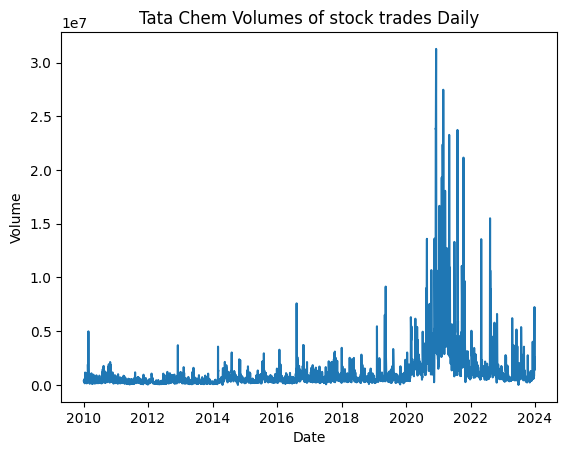

In [62]:
# Now lets plot the total volume of the stockes being traded each day
plt.plot(df1.Date, df1.Volume)
plt.title("Tata Chem Volumes of stock trades Daily")
plt.xlabel('Date')
plt.ylabel('Volume')

**We can cleary see that during the covid-19 period there is sudden increse in volume traded**


# Now lets calculate the moving Average pf the stock for 10 20 and 50 days moving average

In [63]:
moving_avg_day=[10,20,50,100]
for moving_avg in moving_avg_day:
  column_name=f'Moving Avg For{moving_avg} days '
  df1[column_name]= df1['Adj Close'].rolling(moving_avg).mean()

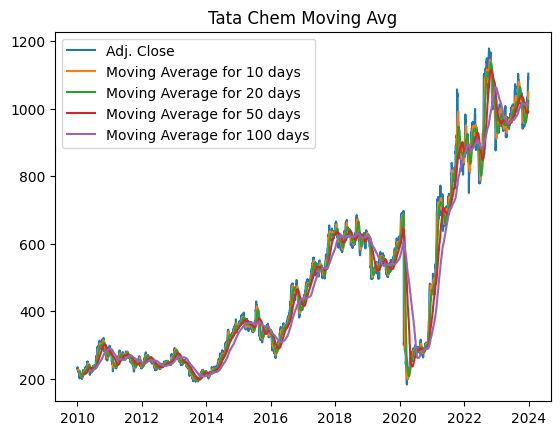

In [64]:
plt.plot(df1['Date'], df1['Adj Close'])
plt.plot(df1['Date'], df1['Moving Avg For10 days '] )
plt.plot(df1['Date'], df1['Moving Avg For20 days '] )
plt.plot(df1['Date'], df1['Moving Avg For50 days '] )
plt.plot(df1['Date'], df1['Moving Avg For100 days '] )
plt.title('Tata Chem Moving Avg')
plt.legend(("Adj. Close", "Moving Average for 10 days", "Moving Average for 20 days", "Moving Average for 50 days", "Moving Average for 100 days"))

## **What was the daily return of the stock on average ?**

*Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.*

In [65]:
# pct_change() function calculates the percentage change between the current and a prior element.
# This function by default calculates the percentage change from the immediately previous row.

df1['Daily Return']= df1['Adj Close'].pct_change()

Text(0, 0.5, 'Daily Return')

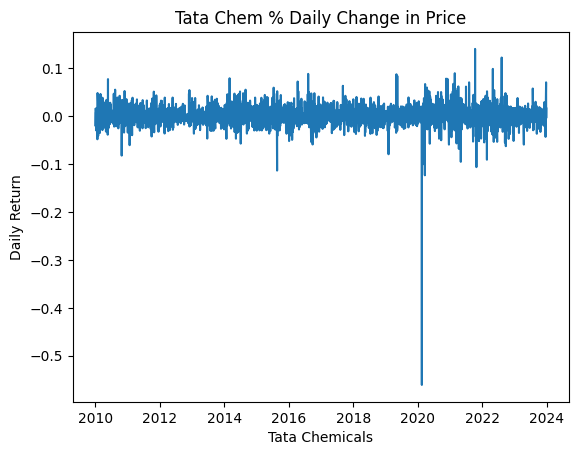

In [66]:
plt.plot(df1['Date'], df1['Daily Return'])
plt.title('Tata Chem % Daily Change in Price')
plt.xlabel('Tata Chemicals')
plt.ylabel('Daily Return')

**We can clearly see the effect of covid 19 pandemic lockdown leads to sudden break down in price**

Text(0.5, 1.0, 'Tata Chem Overall Avg Daily Return')

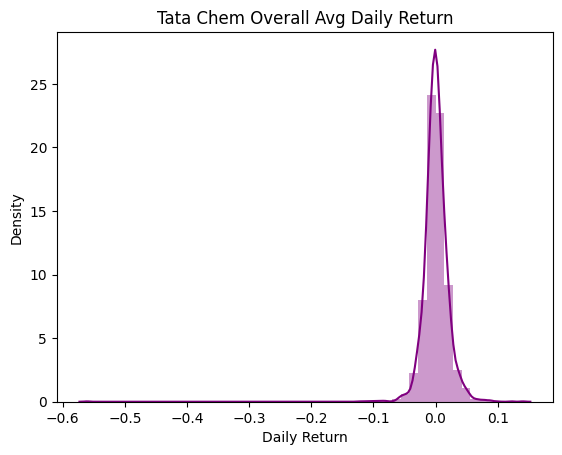

In [69]:
import warnings
warnings.filterwarnings('ignore')

sns.distplot(df1['Daily Return'].dropna(), color='purple')
plt.title('Tata Chem Overall Avg Daily Return')

**Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words kurtosis identifies whether the tails of a given distribution contain extreme values.**

Leptokurtic: A distribution with fatter tails and a higher peak than a normal distribution (positive kurtosis).

In [71]:
print('Kurtosis Value')
print(f"Tata Chemical : {df1['Daily Return'].kurtosis()}")

Kurtosis Value
Tata Chemical : 155.46616017201768


<Axes: >

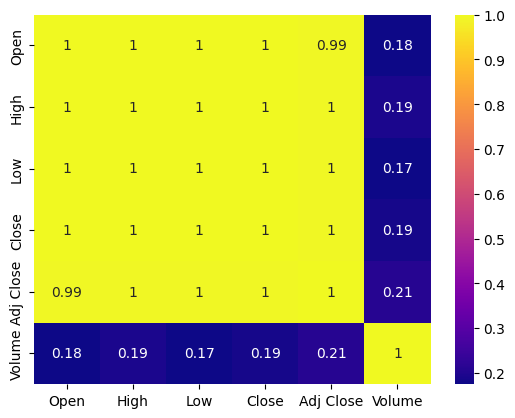

In [83]:
col=df1.columns.drop(['Moving Avg For10 days ', 'Moving Avg For20 days ', 'Moving Avg For50 days ', 'Moving Avg For100 days ', 'Daily Return'])
sns.heatmap(df1[col].corr(), annot=True, cmap='plasma')

**How much value do we put at risk by investing in a paticular stock ?**

*There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.*

Text(0, 0.5, 'Risk')

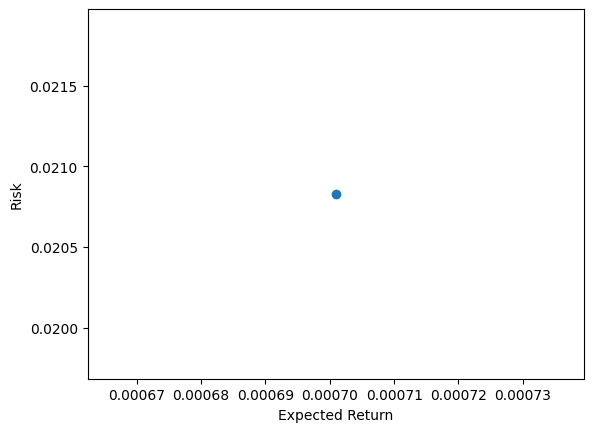

In [86]:
returns=df1['Daily Return'].dropna()

plt.scatter(returns.mean(), returns.std())
plt.xlabel("Expected Return")
plt.ylabel('Risk')